In [17]:
import pyrealsense2 as rs
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [18]:

# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()

# Get device product line for setting a supporting resolution
# pipeline_wrapper = rs.pipeline_wrapper(pipeline)
# pipeline_profile = config.resolve(pipeline_wrapper)
# device = pipeline_profile.get_device()
# device_product_line = str(device.get_info(rs.camera_info.product_line))

In [19]:
w,h = (640,480)
fps = 30
config.enable_stream(rs.stream.color, 
        w, h, rs.format.bgr8, fps)
config.enable_stream(rs.stream.depth, 
        w, h, rs.format.z16, fps)
# if self.enable_infrared:
#     rs_config.enable_stream(rs.stream.infrared,
#         w, h, rs.format.y8, fps)

config.enable_device(serials[0])

# start pipeline
pipeline = rs.pipeline()
pipeline_profile = pipeline.start(config)

# report global time
# https://github.com/IntelRealSense/librealsense/pull/3909
device = pipeline_profile.get_device()
sensors = device.query_sensors()
for s in sensors:
    if s.is_color_sensor():
        s.set_option(rs.option.global_time_enabled, 1)

In [12]:
device

<pyrealsense2.device: D435 (S/N: 408322070972  FW: 5.13.0.55  on USB)>

In [13]:
found_rgb = False
for s in device.sensors:
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        found_rgb = True
        break
found_rgb

True

In [14]:

for sensor in device.sensors:
    print("Sensor:", sensor.get_info(rs.camera_info.name))
    for s in sensor.get_stream_profiles():
        vp = s.as_video_stream_profile()
        print(f"  {vp.format()} {vp.width()}x{vp.height()} @ {vp.fps()} fps")


Sensor: Stereo Module
  format.y8 1280x720 @ 6 fps
  format.y8 848x480 @ 10 fps
  format.y8 848x480 @ 8 fps
  format.y8 848x480 @ 6 fps
  format.y8 640x480 @ 30 fps
  format.y8 640x480 @ 15 fps
  format.y8 640x480 @ 6 fps
  format.y8 640x360 @ 30 fps
  format.y8 480x270 @ 60 fps
  format.y8 480x270 @ 30 fps
  format.y8 480x270 @ 15 fps
  format.y8 480x270 @ 6 fps
  format.y8 1280x720 @ 6 fps
  format.y8 848x480 @ 10 fps
  format.y8 848x480 @ 8 fps
  format.y8 848x480 @ 6 fps
  format.y8 640x480 @ 30 fps
  format.y8 640x480 @ 15 fps
  format.y8 640x480 @ 6 fps
  format.y8 640x360 @ 30 fps
  format.y8 480x270 @ 60 fps
  format.y8 480x270 @ 30 fps
  format.y8 480x270 @ 15 fps
  format.y8 480x270 @ 6 fps
  format.z16 1280x720 @ 6 fps
  format.z16 848x480 @ 10 fps
  format.z16 848x480 @ 8 fps
  format.z16 848x480 @ 6 fps
  format.z16 640x480 @ 30 fps
  format.z16 640x480 @ 15 fps
  format.z16 640x480 @ 6 fps
  format.z16 640x360 @ 30 fps
  format.z16 480x270 @ 60 fps
  format.z16 480x270 @ 

In [31]:
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

RuntimeError: start() cannot be called before stop()

In [20]:
a = []
for x in range(1000):
    frames = pipeline.wait_for_frames()
    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()
    print(color_frame.get_data())

    # Convert images to numpy arrays
    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())

    # Apply colormap on depth image (image must be converted to 8-bit per pixel first)
    depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

    depth_colormap_dim = depth_colormap.shape
    color_colormap_dim = color_image.shape

    # If depth and color resolutions are different, resize color image to match depth image for display
    if depth_colormap_dim != color_colormap_dim:
        resized_color_image = cv2.resize(color_image, dsize=(depth_colormap_dim[1], depth_colormap_dim[0]), interpolation=cv2.INTER_AREA)
        images = np.hstack((resized_color_image, depth_colormap))
    else:
        images = np.hstack((color_image, depth_colormap))
    
    a.append(depth_image)


KeyboardInterrupt: 

In [25]:
type(a[0])

numpy.ndarray

In [27]:
color_image

array([[[ 54,  71,  85],
        [ 56,  73,  87],
        [ 64,  76,  91],
        ...,
        [152, 160, 167],
        [153, 159, 166],
        [153, 159, 166]],

       [[ 56,  71,  85],
        [ 58,  73,  87],
        [ 62,  74,  89],
        ...,
        [150, 160, 167],
        [151, 159, 166],
        [151, 159, 166]],

       [[ 56,  71,  85],
        [ 58,  73,  87],
        [ 62,  75,  88],
        ...,
        [149, 158, 167],
        [151, 158, 167],
        [151, 158, 167]],

       ...,

       [[ 42,  52,  74],
        [ 42,  52,  74],
        [ 42,  50,  77],
        ...,
        [  8,   7,   0],
        [  8,   7,   0],
        [  9,   8,   0]],

       [[ 43,  52,  77],
        [ 42,  51,  76],
        [ 42,  50,  77],
        ...,
        [  8,   6,   0],
        [  8,   7,   0],
        [  9,   8,   0]],

       [[ 43,  52,  77],
        [ 42,  51,  76],
        [ 42,  50,  77],
        ...,
        [  9,   7,   1],
        [  8,   7,   0],
        [  9,   8,   0]]

In [7]:
len(a)

100

In [3]:
serials = list()
for d in rs.context().devices:
    if d.get_info(rs.camera_info.name).lower() != 'platform camera':
        serial = d.get_info(rs.camera_info.serial_number)
        product_line = d.get_info(rs.camera_info.product_line)
        if product_line == 'D400':
            # only works with D400 series
            serials.append(serial)
serials = sorted(serials)
serials

['408322070972']

In [24]:
a[10][:,:640,:]

array([[[ 56,  52,  52],
        [ 55,  51,  51],
        [ 45,  52,  48],
        ...,
        [180, 163, 174],
        [178, 163, 177],
        [176, 161, 175]],

       [[ 58,  51,  52],
        [ 56,  49,  50],
        [ 48,  53,  49],
        ...,
        [179, 163, 171],
        [178, 163, 175],
        [176, 161, 173]],

       [[ 59,  53,  51],
        [ 57,  51,  49],
        [ 53,  54,  51],
        ...,
        [180, 165, 171],
        [180, 164, 172],
        [179, 163, 171]],

       ...,

       [[ 53,  42,  36],
        [ 52,  41,  35],
        [ 49,  40,  35],
        ...,
        [ 32,  26,  24],
        [ 31,  28,  25],
        [ 31,  28,  25]],

       [[ 52,  41,  35],
        [ 52,  41,  35],
        [ 49,  41,  34],
        ...,
        [ 31,  25,  23],
        [ 31,  28,  25],
        [ 31,  28,  25]],

       [[ 52,  41,  35],
        [ 52,  41,  35],
        [ 49,  41,  34],
        ...,
        [ 31,  25,  23],
        [ 29,  26,  23],
        [ 30,  27,  24]]

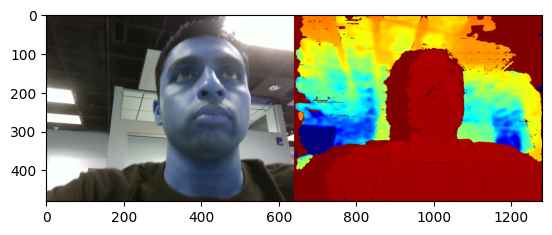

In [22]:
plt.imshow(a[21])

In [26]:
pipeline.stop()